In [10]:
from pathlib import Path
import numpy as np
import os
import shutil
# run adversarial that trained with ladder training
models_dir = Path("/home/isaacp/sharedrepos/IsaacLab-HARL/scripts/reinforcement_learning/harl/"
                  "results/isaaclab/leatherback-Sumo-Direct-MA-Stage2-v0/happo_adv/"
                  "leatherback_ladder_training/seed-00001-2025-08-29-15-44-20/models/checkpoints")

checkpoint_1_folder="episode_1"
results = {}
results["episode_num"] = []

for curr_folder in sorted(os.listdir(models_dir),
                          key=lambda x: int(x.split("_")[-1]) if "episode" in x else -1):
    if "episode" in curr_folder:
        episode_num = int(curr_folder.split("_")[-1])
        results["episode_num"].append(episode_num)

        checkpoint_1_path=models_dir / checkpoint_1_folder
        curr_checkpoint_path=models_dir / curr_folder

        new_checkpoint_path = models_dir / "curr_checkpoint"

        # we take the policies from the first checkpoint and compare them against the current policies
        os.makedirs(new_checkpoint_path, exist_ok=True)
        shutil.copy(checkpoint_1_path / "actor_agent_robot_2.pt", new_checkpoint_path / "actor_agent_robot_2.pt")
        shutil.copy(checkpoint_1_path / "actor_agent_robot_3.pt", new_checkpoint_path / "actor_agent_robot_3.pt")
        shutil.copy(curr_checkpoint_path / "actor_agent_robot_0.pt", new_checkpoint_path / "actor_agent_robot_0.pt")
        shutil.copy(curr_checkpoint_path / "actor_agent_robot_1.pt", new_checkpoint_path / "actor_agent_robot_1.pt")

        npz_save_path = "./ladder_training_results.npz"

        !python ./get_adversarial_results.py \
            --num_envs 1000 \
            --algo "happo_adv" \
            --task "leatherback-Sumo-Direct-MA-Stage2-v0" \
            --seed 1 \
            --num_env_steps 1_000_000 \
            --dir {new_checkpoint_path} \
            --save_path {npz_save_path} \
            --debug \
            --headless

        res = np.load(npz_save_path)
        for k, v in res.items():
            if k not in results:
                results[k] = []
            results[k].append(v.item())

[INFO][AppLauncher]: Using device: cuda:0
[INFO][AppLauncher]: Loading experience file: /home/isaacp/sharedrepos/IsaacLab-HARL/apps/isaaclab.python.headless.kit
[Warning] [simulation_app.simulation_app] Modules: ['omni.kit_app'] were loaded before SimulationApp was started and might not be loaded correctly.
[Warning] [simulation_app.simulation_app] Please check to make sure no extra omniverse or pxr modules are imported before the call to SimulationApp(...)
Loading user config located at: '/home/isaacp/miniconda3/envs/env_isaaclab/lib/python3.10/site-packages/omni/data/Kit/Isaac-Sim/4.5/user.config.json'
[Info] [carb] Logging to file: /home/isaacp/miniconda3/envs/env_isaaclab/lib/python3.10/site-packages/omni/logs/Kit/Isaac-Sim/4.5/kit_20250902_115324.log
2025-09-02 17:53:24 s] [Warning] [omni.kit.app.plugin] No crash reporter present, dumps uploading isn't available.
2025-09-02 17:53:24 s] [Warning] [omni.ext.plugin] [ext: rendering_modes] Extensions config 'extension.toml' doesn't ex

In [12]:
results.keys()

dict_keys(['episode_num', 'team0_win_percentage', 'team1_win_percentage', 'Episode_Reward/team_0_push_out_reward', 'Episode_Reward/team_1_push_out_reward'])

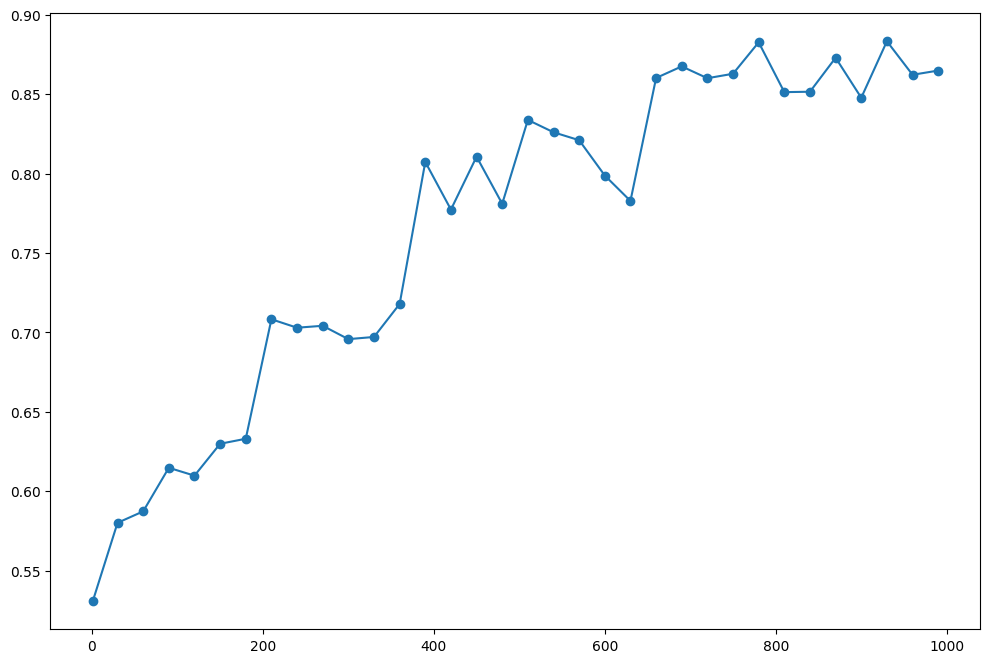

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(results["episode_num"], results["team0_win_percentage"], marker='o')
plt.show()